In [30]:
import random
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


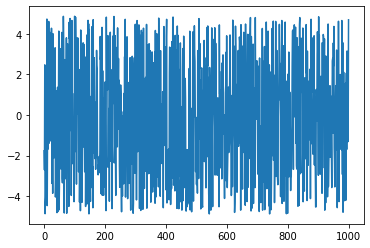

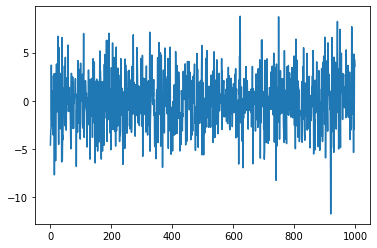

In [31]:
# 8 2 15
sigma2 = 8
delta = 2
T = 15
size = 1000

r = math.sqrt(12 * sigma2) / 2
l = -r
white_noise_uniform = [random.uniform(l, r) for _ in range(size)]
plt.plot(range(len(white_noise_uniform)), white_noise_uniform)
plt.show()

white_noise_normal = [random.normalvariate(0, math.sqrt(sigma2)) for _ in range(size)]
plt.plot(range(len(white_noise_normal)), white_noise_normal)
plt.show()

a = math.exp(-delta/T)
b = math.sqrt(1 - math.exp(-2 * delta / T))

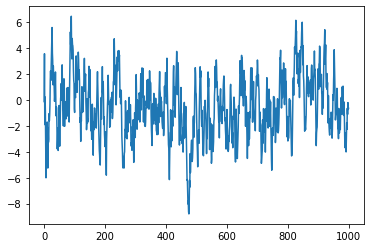

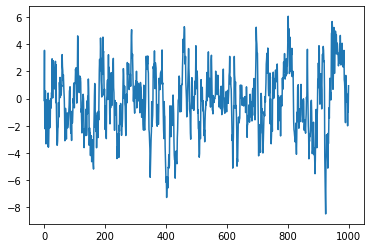

In [32]:
yout_uniform = []
yout_norm = []

for i in range(size):
    x0 = random.normalvariate(1, 4)
    sum_1 = 0
    sum_2 = 0
    for j in range(1, i):
        sum_1 = sum_1 + (a ** (i-j)) * b * white_noise_uniform[j]
        sum_2 = sum_2 + (a ** (i-j)) * b * white_noise_normal[j]
    yout_uniform.append((a ** i) * x0 + sum_1)
    yout_norm.append((a ** i) * x0 + sum_2)

plt.plot(range(len(yout_uniform)), yout_uniform)
plt.show()

plt.plot(range(len(yout_norm)), yout_norm)
plt.show()

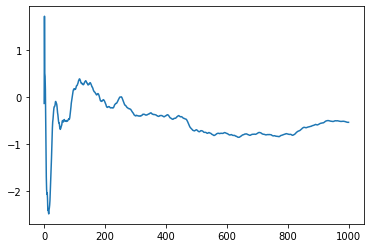

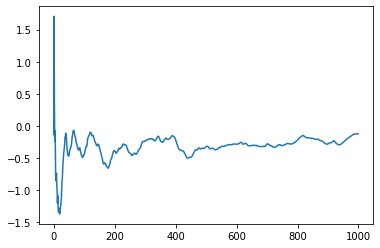

In [33]:
m_1 = []
m_2 = []

for i in range(size):
    m_1.append(statistics.mean(yout_uniform[:i+1]))
    m_2.append(statistics.mean(yout_norm[:i+1]))
    
plt.plot(range(len(m_1)), m_1)
plt.show()

plt.plot(range(len(m_2)), m_2)
plt.show()

In [34]:
m1 = statistics.mean(yout_uniform)
m2 = statistics.mean(yout_norm)
v1 = statistics.variance(yout_uniform)
v2 = statistics.variance(yout_norm)

corr_1 = np.correlate(yout_uniform, yout_uniform, mode='full')
corr_2 = np.correlate(yout_norm, yout_norm, mode='full')

# TODO: plot

In [35]:
anderson_uniform = st.kstest(yout_uniform, 'uniform')
anderson_norm = st.kstest(yout_norm, 'norm')

# TODO?: pburg